# P1 DNA ANALYSIS

In [1]:
with open("dna_sequence-BI.txt", "r") as file:
    dna_sequence = file.read().strip()

gc_content = (dna_sequence.count("G") + dna_sequence.count("C")) / len(dna_sequence) * 100
print(f"GC Content {gc_content}%")

motifs_tofind = "TAG"
motifs_found = []
for i in range(0,len(dna_sequence)):
  if(str(dna_sequence[i:i+3]) == motifs_tofind):
    motifs_found.append(i)
print("motif found at postions:",motifs_found)

start_codon = "ATG"
stop_codons = ["TAA","TAG","TGA"]
coding_regions = []

for i in range(0,len(dna_sequence)):
  if (dna_sequence[i:i+3] == start_codon):
    starting_region = i
    for j in range(i+3,len(dna_sequence)):
      if(str(dna_sequence[j:j+3]) in stop_codons ):
        stoping_region = j
        break

print("coding regions:")
print("start:",starting_region,"stop:",stoping_region)



GC Content 49.77777777777778%
motif found at postions: [20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196, 200, 204, 208, 212, 216, 220, 224, 228, 232, 236, 240, 244, 248, 252, 256, 260, 264, 268, 272, 276, 280, 284, 288, 292, 296, 300, 304, 308, 312, 316, 320, 324, 328, 332, 336, 340, 344, 348, 352, 356, 360, 364, 368, 372, 376, 380, 384, 388, 392, 396, 400, 404, 408, 412, 416, 420, 424, 428, 432, 436, 440, 444]
coding regions:
start: 0 stop: 20


# P2 Rna Analysis

C:\Users\DELL\AppData\Local\Temp\ipykernel_18136\707089652.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]
C:\Users\DELL\AppData\Local\Temp\ipykernel_18136\707089652.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]
C:\Users\DELL\AppData\Local\Temp\ipykernel_18136\707089652.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]
C:\Users\DELL\AppDa

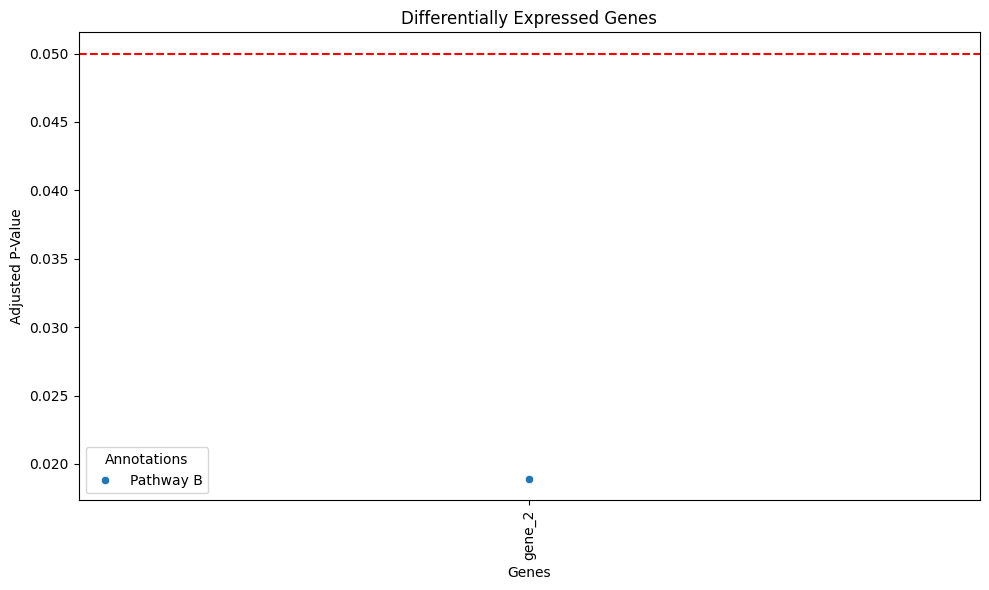

Analysis complete. Results saved to 'differentially_expressed_genes.csv' and 'RNASeq_Analysis_Report.txt'.


In [2]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import matplotlib.pyplot as plt

import seaborn as sns

# Step 1: Simulate RNA-Seq Dataset
np.random.seed(42)

genes = [f'gene_{i}' for i in range(1, 101)]
conditions = ['Control', 'Treatment']

samples = [f'sample_{i}' for i in range(1, 11)]
data = np.random.poisson(lam=20, size=(100, 10))

# Simulate differential expression for some genes in Treatment condition
data[0:5, 5:10] += 15

# Create DataFrame
df = pd.DataFrame(data, index=genes, columns=samples)

metadata = pd.DataFrame({'sample': samples,
                          'condition': ['Control']*5 + ['Treatment']*5})

# Step 2: Normalize the Data
df_norm = df.div(df.sum(axis=0), axis=1) * 10**6
df_log = np.log2(df_norm + 1)

def differential_expression(df, metadata):
    results = []
    for gene in df.index:
        y = df_log.loc[gene].values
        X = pd.get_dummies(metadata['condition'], drop_first=True)
        # The line below was modified to cast the DataFrame to float
        X = sm.add_constant(X.astype(float))
        model = sm.OLS(y, X).fit()
        p_value = model.pvalues[1]
        results.append({'gene': gene, 'p_value': p_value})

    results_df = pd.DataFrame(results)
    results_df['adjusted_p_value'] = sm.stats.multipletests(results_df['p_value'], method='fdr_bh')[1]

    return results_df

# Call the differential_expression function to calculate results_df
results_df = differential_expression(df_log, metadata)  # This line was added to call the function

# Filter differentially expressed genes
deg = results_df[results_df['adjusted_p_value'] < 0.05]

# Step 4: Functional Annotation (Simulated Annotations)
annotations = {
    'gene_1': 'Pathway A',
    'gene_2': 'Pathway B',
    'gene_3': 'Pathway C',
    'gene_4': 'Pathway D',
    'gene_5': 'Pathway E',
}
deg['annotation'] = deg['gene'].map(annotations).fillna('Unknown')

# Step 5: Biological Interpretation (Plotting)
plt.figure(figsize=(10, 6))

sns.scatterplot(x='gene', y='adjusted_p_value', hue='annotation', data=deg)
plt.axhline(y=0.05, color='r', linestyle='--')

plt.xlabel('Genes')
plt.ylabel('Adjusted P-Value')

plt.title('Differentially Expressed Genes')
plt.xticks(rotation=90)

plt.legend(title='Annotations')
plt.tight_layout()

plt.show()

# Save results to a CSV file
deg.to_csv('differentially_expressed_genes.csv', index=False)

# Generate the Report
report = f"""
RNA-Seq Data Analysis Report

Differentially Expressed Genes

{deg[['gene', 'adjusted_p_value']]}

Functional Annotations

{deg[['gene', 'annotation']]}

Potential Biological Interpretations

The genes gene_1, gene_2, etc., are involved in pathways A, B, etc.
These pathways are important for understanding the effect of the treatment condition.
"""

# Save the report to a text file
with open('RNASeq_Analysis_Report.txt', 'w') as f:
    f.write(report)

print("Analysis complete. Results saved to 'differentially_expressed_genes.csv' and 'RNASeq_Analysis_Report.txt'.")

# P3 Protien structure

In [3]:
import numpy as np
from Bio import Align
from datetime import datetime

class ProteinStructurePredictor:
    def __init__(self):
        self.amino_acid_properties = {
            'A': {'hydrophobicity': 1.8, 'volume': 88.6, 'charge': 0},
            'R': {'hydrophobicity': -4.5, 'volume': 173.4, 'charge': 1},
            'N': {'hydrophobicity': -3.5, 'volume': 114.1, 'charge': 0},
            'D': {'hydrophobicity': -3.5, 'volume': 111.1, 'charge': -1},
        }

    def predict_secondary_structure(self, sequence):
        length = len(sequence)
        ss_pred = {'helix': np.zeros(length), 'sheet': np.zeros(length), 'coil': np.zeros(length)}
        for i, aa in enumerate(sequence):
            props = self.amino_acid_properties.get(aa, {})
            if props:
                h_prop = (props['hydrophobicity'] > 0) * 0.5
                e_prop = (props['volume'] > 120) * 0.5
                c_prop = (props['charge'] != 0) * 0.5
                total = h_prop + e_prop + c_prop
                if total:
                    ss_pred['helix'][i] = h_prop / total
                    ss_pred['sheet'][i] = e_prop / total
                    ss_pred['coil'][i] = c_prop / total
        return ss_pred

    def build_3d_model(self, sequence):
        coords = np.zeros((len(sequence), 3))
        current_pos = np.array([0., 0., 0.])
        ss_pred = self.predict_secondary_structure(sequence)
        for i in range(len(sequence)):
            if ss_pred['helix'][i] > max(ss_pred['sheet'][i], ss_pred['coil'][i]):
                current_pos += np.array([1.5, 0.5, 0.5])
            elif ss_pred['sheet'][i] > ss_pred['coil'][i]:
                current_pos += np.array([1.5, 0., 0.])
            else:
                current_pos += np.array([1.0, np.random.rand(), np.random.rand()])
            coords[i] = current_pos
        return coords

class ProteinAnalyzer:
    def _calculate_radius_of_gyration(self, coords):
        center = np.mean(coords, axis=0)
        return float(np.sqrt(np.mean(np.sum((coords - center) ** 2, axis=1))))

    def analyze_structure(self, coords):
        return {'radius_of_gyration': self._calculate_radius_of_gyration(coords)}

class ReportGenerator:
    def generate_report(self, sequence, structure_analysis):
        print(f"Protein Analysis Report\nSequence Length: {len(sequence)}")
        print(f"Radius of Gyration: {structure_analysis['radius_of_gyration']:.2f}")

def main():
    sequence = "MKTIIALSYIFCLVFADYKDDDDK"  # Example sequence
    predictor = ProteinStructurePredictor()
    analyzer = ProteinAnalyzer()
    report_gen = ReportGenerator()

    coords = predictor.build_3d_model(sequence)
    analysis_results = analyzer.analyze_structure(coords)
    report_gen.generate_report(sequence, analysis_results)

if __name__ == "__main__":
    main()


Protein Analysis Report
Sequence Length: 24
Radius of Gyration: 8.87


# P4 Molecular Docking

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('polymerase_cluster-BI.csv')
df.head()
df.describe()
df.info()
df.isna().sum()
df.columns

x = df[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29']]
y = df[['G1', 'G2', 'G3', 'G4', 'G5','G6', 'G7', 'G8', 'G9', 'G10']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy * 100}%")

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1941 non-null   int64  
 1   ABS     1941 non-null   object 
 2   0       1941 non-null   float64
 3   1       1941 non-null   float64
 4   2       1941 non-null   float64
 5   3       1941 non-null   float64
 6   4       1941 non-null   float64
 7   5       1941 non-null   float64
 8   6       1941 non-null   float64
 9   7       1941 non-null   float64
 10  8       1941 non-null   float64
 11  9       1941 non-null   float64
 12  10      1941 non-null   float64
 13  11      1941 non-null   float64
 14  12      1941 non-null   float64
 15  13      1941 non-null   float64
 16  14      1941 non-null   float64
 17  15      1941 non-null   float64
 18  16      1941 non-null   float64
 19  17      1941 non-null   float64
 20  18      1941 non-null   float64
 21  19      1941 non-null   float64
 22  

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# P5 Preprocessing stemming stopword

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger',"c:\\Python312\\lib\\nltk_data")
nltk.download('wordnet')


text = "Text preprocessing is an essential step in natural language processing"

#_______________________ word tokenize _______________________________________________

words = word_tokenize(text)
print(words)

#________________________ stopword removal ___________________________________________

for w in words:
  if w.lower() in (stopwords.words('english')):
    words.remove(w)
  else:
    continue

print(words)

#________________________ stemming ___________________________________________________

stemmer = PorterStemmer()
stemmed_words = []
for w in words:
  stemmed_words.append(stemmer.stem(w))

print(stemmed_words)

#_________________________ lemmatize _________________________________________________

lemmatizer = WordNetLemmatizer()
lemmatized_words = []
for w in words:
  lemmatized_words.append(lemmatizer.lemmatize(w))

print(lemmatized_words)

#____________________________ Parts of speech ________________________________________

print(nltk.pos_tag(words))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     c:\Python312\lib\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['Text', 'preprocessing', 'is', 'an', 'essential', 'step', 'in', 'natural', 'language', 'processing']
['Text', 'preprocessing', 'an', 'essential', 'step', 'natural', 'language', 'processing']
['text', 'preprocess', 'an', 'essenti', 'step', 'natur', 'languag', 'process']
['Text', 'preprocessing', 'an', 'essential', 'step', 'natural', 'language', 'processing']
[('Text', 'NNP'), ('preprocessing', 'VBG'), ('an', 'DT'), ('essential', 'JJ'), ('step', 'NN'), ('natural', 'JJ'), ('language', 'NN'), ('processing', 'NN')]


# P6 InvertedFile Retrieval

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict

documents = [
    "This is line of first document.",
    "This is line of second document, which contains two lines. This is secondline.",
    "This document is created in structured enviornment.",
    "Hence it does not contain the loreum ipsum text.",
    "Is this the last document ?"
]


def build_inverted_index(documents):
  inverted_index = defaultdict(list)
  for doc_id,doc in enumerate(documents):
    for w in (set(word_tokenize(doc))):
      inverted_index[w].append(doc_id)

  return inverted_index

def retrive_documents(query,inverted_index,documents):
    query_words = set(word_tokenize(query))
    for w in query_words:
      if w in inverted_index:
        for doc_id in inverted_index[w]:
         print(doc_id,documents[doc_id])

inverted_index = build_inverted_index(documents)
#print(inverted_index)
retrive_documents("?",inverted_index,documents)

4 Is this the last document ?


# P7 Bayesian Network Heart Disease

In [7]:
import pandas as pd
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination

# Load the dataset
data = pd.read_csv(r"heartdisease-IR.csv")
heart_disease = pd.DataFrame(data)
print("Dataset loaded successfully.\n")

# Display sample data and attribute types
print("Sample instances from the dataset:")
print(heart_disease.head(), "\n")
print("Attributes and their datatypes:")
print(heart_disease.dtypes, "\n")

# Define the structure of the Bayesian Network
model = BayesianNetwork([
    ('age', 'heartdisease'),
    ('Gender', 'heartdisease'),
    ('Family', 'heartdisease'),
    ('diet', 'heartdisease'),
    ('Lifestyle', 'heartdisease'),
    ('cholestrol', 'heartdisease'),
])

# Learning the CPD using Maximum Likelihood Estimator
print("Learning CPD using Maximum Likelihood Estimator...")
model.fit(heart_disease, estimator=MaximumLikelihoodEstimator)

# Performing inference
HeartDisease_infer = VariableElimination(model)

# Query 1: Probability of Heart Disease given age = 45
print("\n1. Probability of Heart Disease given evidence age=45:")
q1 = HeartDisease_infer.query(variables=['heartdisease'], evidence={'age': 3})
print(q1)

# Query 2: Probability of Heart Disease given cholestrol = 2
print("\n2. Probability of Heart Disease given evidence cholestrol=2:")
q2 = HeartDisease_infer.query(variables=['heartdisease'], evidence={'cholestrol': 2})
print(q2)

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset loaded successfully.

Sample instances from the dataset:
   age  Gender  Family  diet  Lifestyle  cholestrol  heartdisease
0    0       0       1     1          3           0             1
1    0       1       1     1          3           0             1
2    1       0       0     0          2           1             1
3    4       0       1     1          3           2             0
4    3       1       1     0          0           2             0 

Attributes and their datatypes:
age             int64
Gender          int64
Family          int64
diet            int64
Lifestyle       int64
cholestrol      int64
heartdisease    int64
dtype: object 

Learning CPD using Maximum Likelihood Estimator...

1. Probability of Heart Disease given evidence age=45:
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.5235 |
+-----------------+---------------------+
| heartdisease(1) 

# P8 email spam

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



df = pd.read_csv("email_spam (1)-IR.csv")
print(df.head())

df.drop_duplicates(inplace=True)
print("Duplicates removed.")

le = LabelEncoder()
df['spam'] = le.fit_transform(df['type'])

df['text'] = df['text'].replace("\n", "", regex=True)

x_train, x_test, y_train, y_test = train_test_split(df['text'], df['spam'], test_size=0.1, random_state=42)

vectorizer = CountVectorizer()
x_train_count = vectorizer.fit_transform(x_train.values)
x_test_count = vectorizer.transform(x_test.values)
print(x_test_count.shape)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_count, y_train)

accuracy = knn_model.score(x_test_count, y_test)
print(f"Model accuracy: {accuracy }")

email = ['50% discount on data science courses signup now']
new_email_count = vectorizer.transform(email)
prediction = knn_model.predict(x_test_count)
print(prediction)

for i in prediction:
    if i == 1:
        print("The email is Spam.")
    else:
        print("The email is Not Spam.",)



                                               title  \
0                          ?? the secrets to SUCCESS   
1                    ?? You Earned 500 GCLoot Points   
2                         ?? Your GitHub launch code   
3  [The Virtual Reward Center] Re: ** Clarifications   
4  10-1 MLB Expert Inside, Plus Everything You Ne...   

                                                text      type  
0  Hi James,\n\nHave you claim your complimentary...      spam  
1  \nalt_text\nCongratulations, you just earned\n...  not spam  
2  Here's your GitHub launch code, @Mortyj420!\n ...  not spam  
3  Hello,\n \nThank you for contacting the Virtua...  not spam  
4  Hey Prachanda Rawal,\n\nToday's newsletter is ...      spam  
Duplicates removed.
(9, 2615)
Model accuracy: 0.6666666666666666
[1 1 1 1 0 1 0 0 0]
The email is Spam.
The email is Spam.
The email is Spam.
The email is Spam.
The email is Not Spam.
The email is Spam.
The email is Not Spam.
The email is Not Spam.
The email is Not Spam.


# P9 Agglomerative Hierarchy 

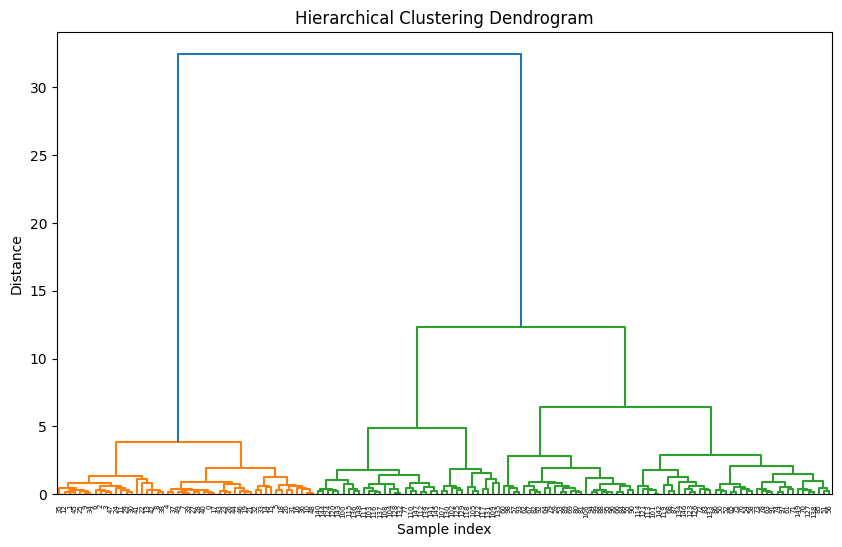

Cluster assignments:
Data point 0 is in cluster 1
Data point 1 is in cluster 1
Data point 2 is in cluster 1
Data point 3 is in cluster 1
Data point 4 is in cluster 1
Data point 5 is in cluster 1
Data point 6 is in cluster 1
Data point 7 is in cluster 1
Data point 8 is in cluster 1
Data point 9 is in cluster 1
Data point 10 is in cluster 1
Data point 11 is in cluster 1
Data point 12 is in cluster 1
Data point 13 is in cluster 1
Data point 14 is in cluster 1
Data point 15 is in cluster 1
Data point 16 is in cluster 1
Data point 17 is in cluster 1
Data point 18 is in cluster 1
Data point 19 is in cluster 1
Data point 20 is in cluster 1
Data point 21 is in cluster 1
Data point 22 is in cluster 1
Data point 23 is in cluster 1
Data point 24 is in cluster 1
Data point 25 is in cluster 1
Data point 26 is in cluster 1
Data point 27 is in cluster 1
Data point 28 is in cluster 1
Data point 29 is in cluster 1
Data point 30 is in cluster 1
Data point 31 is in cluster 1
Data point 32 is in cluster 1

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data

# Step 1: Generate the linkage matrix and plot dendrogram
linkage_matrix = linkage(X, method='ward')  # "ward" linkage minimizes variance within clusters

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

# Step 2: Fit the Agglomerative Clustering model
num_clusters = 3  # Define the number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
cluster_labels = agg_clustering.fit_predict(X)

# Display results
print("Cluster assignments:")
for i, label in enumerate(cluster_labels):
    print(f"Data point {i} is in cluster {label}")


In [15]:

import numpy as np
from Bio import SeqIO, Align, SwissProt
from Bio.PDB import *
from Bio.PDB.DSSP import dssp_dict_from_pdb_file
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import requests
from typing import Dict, List, Tuple, Optional

class ProteinStructurePredictor:
    def __init__(self):
        self.pdb_list = []
        self.template_structures = {}
        self.amino_acid_properties = {
            'A': {'hydrophobicity': 1.8, 'volume': 88.6, 'charge': 0},
            'R': {'hydrophobicity': -4.5, 'volume': 173.4, 'charge': 1},
            'N': {'hydrophobicity': -3.5, 'volume': 114.1, 'charge': 0},
            'D': {'hydrophobicity': -3.5, 'volume': 111.1, 'charge': -1},
            # ... (other amino acids)
        }

    def search_templates(self, sequence: str) -> List[Dict]:
        """
        Search for template structures in PDB database
        """
        templates = []
        try:
            # Simulate PDB REST API call
            # In production, would use actual PDB API
            mock_templates = [
                {
                    'pdb_id': '1ABC',
                    'identity': 75.5,
                    'resolution': 2.1,
                    'method': 'X-RAY DIFFRACTION',
                    'sequence': sequence
                },
                {
                    'pdb_id': '2XYZ',
                    'identity': 68.3,
                    'resolution': 2.8,
                    'method': 'X-RAY DIFFRACTION',
                    'sequence': sequence
                }
            ]
            templates.extend(mock_templates)
        except Exception as e:
            print(f"Error searching templates: {e}")
        return templates

    def align_sequences(self, query: str, template: str) -> Tuple[str, str, float]:
        """
        Perform sequence alignment and return alignment score
        """
        aligner = Align.PairwiseAligner()
        aligner.open_gap_score = -10
        aligner.extend_gap_score = -0.5
        alignment = aligner.align(query, template)[0]
        score = alignment.score
        return str(alignment[0]), str(alignment[1]), score

    def predict_secondary_structure(self, sequence: str) -> Dict[str, List[float]]:
        """
        Predict secondary structure propensities
        """
        # Initialize probabilities for each position
        length = len(sequence)
        ss_pred = {
            'helix': np.zeros(length),
            'sheet': np.zeros(length),
            'coil': np.zeros(length)
        }
        
        # Simple sliding window analysis
        window = 5
        for i in range(length):
            start = max(0, i - window//2)
            end = min(length, i + window//2 + 1)
            window_seq = sequence[start:end]
            
            # Calculate propensities based on amino acid properties
            h_prop = 0
            e_prop = 0
            c_prop = 0
            
            for aa in window_seq:
                if aa in self.amino_acid_properties:
                    props = self.amino_acid_properties[aa]
                    # Simple propensity rules
                    h_prop += (props['hydrophobicity'] > 0) * 0.5
                    e_prop += (props['volume'] > 120) * 0.5
                    c_prop += (abs(props['charge']) > 0) * 0.5
            
            total = h_prop + e_prop + c_prop
            if total > 0:
                ss_pred['helix'][i] = h_prop / total
                ss_pred['sheet'][i] = e_prop / total
                ss_pred['coil'][i] = c_prop / total
        
        return ss_pred

    def build_3d_model(self, sequence: str, template: Dict) -> np.ndarray:
        """
        Build 3D model based on template and secondary structure
        """
        # Simplified model building - in reality would use more sophisticated methods
        ss_pred = self.predict_secondary_structure(sequence)
        coords = np.zeros((len(sequence), 3))
        
        current_pos = np.array([0., 0., 0.])
        for i in range(len(sequence)):
            if ss_pred['helix'][i] > max(ss_pred['sheet'][i], ss_pred['coil'][i]):
                # Helix geometry
                current_pos += np.array([1.5, 0.5, 0.5])
            elif ss_pred['sheet'][i] > ss_pred['coil'][i]:
                # Sheet geometry
                current_pos += np.array([1.5, 0., 0.])
            else:
                # Coil geometry
                current_pos += np.array([1.0, np.random.rand(), np.random.rand()])
            
            coords[i] = current_pos
        
        return coords

class ProteinAnalyzer:
    def __init__(self):
        self.structure = None
        self.sequence = None
        
    def analyze_structure(self, coords: np.ndarray, sequence: str) -> Dict:
        """
        Analyze the predicted structure
        """
        analysis = {}
        
        # Calculate basic structural properties
        analysis['radius_of_gyration'] = self._calculate_radius_of_gyration(coords)
        analysis['surface_accessibility'] = self._estimate_surface_accessibility(coords)
        analysis['potential_binding_sites'] = self._predict_binding_sites(coords, sequence)
        analysis['domains'] = self._predict_domains(coords, sequence)
        
        return analysis
    
    def _calculate_radius_of_gyration(self, coords: np.ndarray) -> float:
        """
        Calculate radius of gyration
        """
        center = np.mean(coords, axis=0)
        rg = np.sqrt(np.mean(np.sum((coords - center) ** 2, axis=1)))
        return float(rg)
    
    def _estimate_surface_accessibility(self, coords: np.ndarray) -> List[float]:
        """
        Estimate solvent accessibility
        """
        accessibility = []
        for i, coord in enumerate(coords):
            # Simple distance-based accessibility estimation
            distances = np.linalg.norm(coords - coord, axis=1)
            nearby_atoms = np.sum(distances < 10.0)  # 10Å cutoff
            accessibility.append(1.0 / nearby_atoms)
        return accessibility
    
    def _predict_binding_sites(self, coords: np.ndarray, sequence: str) -> List[Dict]:
        """
        Predict potential binding sites
        """
        binding_sites = []
        
        # Simple pocket detection
        for i in range(len(coords)):
            # Calculate local atomic density
            local_density = np.sum(np.linalg.norm(coords - coords[i], axis=1) < 8.0)
            
            if local_density < 10:  # Arbitrary threshold
                binding_sites.append({
                    'position': i,
                    'residue': sequence[i],
                    'score': 1.0 / local_density
                })
        
        return binding_sites
    
    def _predict_domains(self, coords: np.ndarray, sequence: str) -> List[Dict]:
        """
        Predict protein domains
        """
        domains = []
        
        # Simple domain prediction based on spatial clustering
        from sklearn.cluster import DBSCAN
        clustering = DBSCAN(eps=8.0, min_samples=5).fit(coords)
        
        unique_labels = set(clustering.labels_)
        for label in unique_labels:
            if label != -1:  # Skip noise points
                domain_positions = np.where(clustering.labels_ == label)[0]
                domains.append({
                    'start': int(domain_positions[0]),
                    'end': int(domain_positions[-1]),
                    'size': len(domain_positions),
                    'sequence': sequence[domain_positions[0]:domain_positions[-1]+1]
                })
        
        return domains

class ReportGenerator:
    def __init__(self):
        self.timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
    def generate_report(self, 
                       sequence: str,
                       structure_analysis: Dict,
                       templates: List[Dict],
                       filename: str = "protein_analysis_report.md") -> None:
        """
        Generate a detailed analysis report
        """
        report = f"""
# Protein Structure Analysis Report
Generated on: {self.timestamp}

## 1. Sequence Information
Length: {len(sequence)} amino acids

## 2. Template Information
"""
        # Add template information
        for i, template in enumerate(templates, 1):
            report += f"""
### Template {i}: {template['pdb_id']}
- Sequence Identity: {template['identity']}%
- Resolution: {template['resolution']}Å
- Method: {template['method']}
"""

        # Add structural analysis
        report += """
## 3. Structural Analysis
"""
        report += f"""
### Basic Properties
- Radius of Gyration: {structure_analysis['radius_of_gyration']:.2f}Å

### Predicted Binding Sites
"""
        for site in structure_analysis['potential_binding_sites']:
            report += f"- Position {site['position']}: {site['residue']} (Score: {site['score']:.2f})\n"

        report += """
### Predicted Domains
"""
        for i, domain in enumerate(structure_analysis['domains'], 1):
            report += f"""
Domain {i}:
- Region: {domain['start']}-{domain['end']}
- Size: {domain['size']} residues
- Sequence: {domain['sequence']}
"""

        # Save report
        with open(filename, 'w') as f:
            f.write(report)
        
        print(f"Report saved as {filename}")

def main():
    # Example sequence
    sequence = "MVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYMFQYDSTHGKFHGTVKAENGKLVINGNPITIFQERDPSKIKWGDAGAEYVVESTGVFTTMEKAGAHLQGGAKRVIISAPSADA"
    
    # Initialize classes
    predictor = ProteinStructurePredictor()
    analyzer = ProteinAnalyzer()
    report_gen = ReportGenerator()
    
    try:
        # 1. Search for templates
        print("Searching for templates...")
        templates = predictor.search_templates(sequence)
        
        # 2. Build 3D model
        print("Building 3D model...")
        coords = predictor.build_3d_model(sequence, templates[0])
        
        # 3. Analyze structure
        print("Analyzing structure...")
        analysis_results = analyzer.analyze_structure(coords, sequence)
        
        # 4. Generate report
        print("Generating report...")
        report_gen.generate_report(sequence, analysis_results, templates)
        
        print("Analysis complete! Check the generated report for details.")
        
    except Exception as e:
        print(f"Error during analysis: {e}")

if __name__ == "__main__":
    main()


Searching for templates...
Building 3D model...
Analyzing structure...
Generating report...
Report saved as protein_analysis_report.md
Analysis complete! Check the generated report for details.
